In [25]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
ress = []
test_params = []
for t_in in [100,200]:
    for t_out in [10,20,50,100]:
        for arch in [1,2,3]:
            data = np.load("res-{}-{}-{}.pickle".format(t_in, t_out, arch), allow_pickle=True)
            ress.append(data)
            test_params.append([t_in, t_out, arch])
            
            
df = pd.DataFrame(np.concatenate([
    np.array(test_params).astype(int),
    np.array([r['mse'] for r in ress]).reshape((-1, 1))
], 1), columns = [
    't_in',
    't_out',
    'arch',
    'mse'
])

<AxesSubplot:xlabel='t_out'>

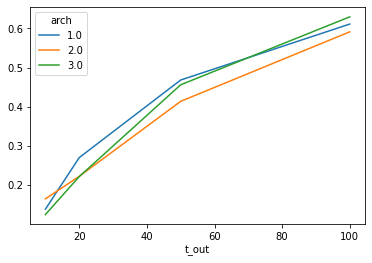

In [27]:
# MSE comparison for 100 in,
# between different architectures

df_100 = df[df.t_in==100]
df_100 = df_100.pivot(index='t_out', columns='arch', values='mse')
df_100.plot()	

<AxesSubplot:xlabel='t_out'>

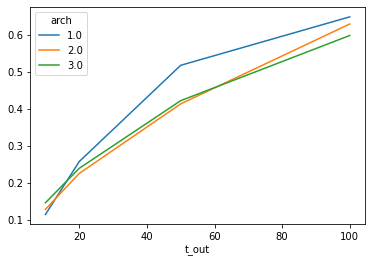

In [28]:
# MSE comparison for 200 in,
# between different architectures

df_200 = df[df.t_in==200]
df_200 = df_200.pivot(index='t_out', columns='arch', values='mse')
df_200.plot()	

<AxesSubplot:xlabel='t_out'>

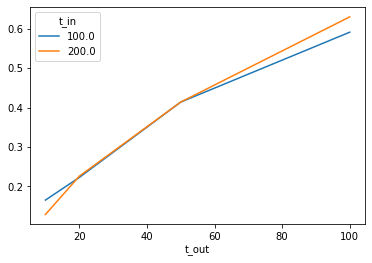

In [29]:
# MSE comparison for Architecture 2,
# all different time settings

df_a2 = df[df.arch==2]
df_a2 = df_a2.pivot(index='t_out', columns='t_in', values='mse')
df_a2.plot()

In [30]:
lossess = []
for res in ress:
    losses = []
    for lt in ['loss', 'val_loss']:
        losses.append(np.concatenate([
            res['hists'][0][lt],
            res['hists'][1][lt]
        ]))
    lossess.append(losses)

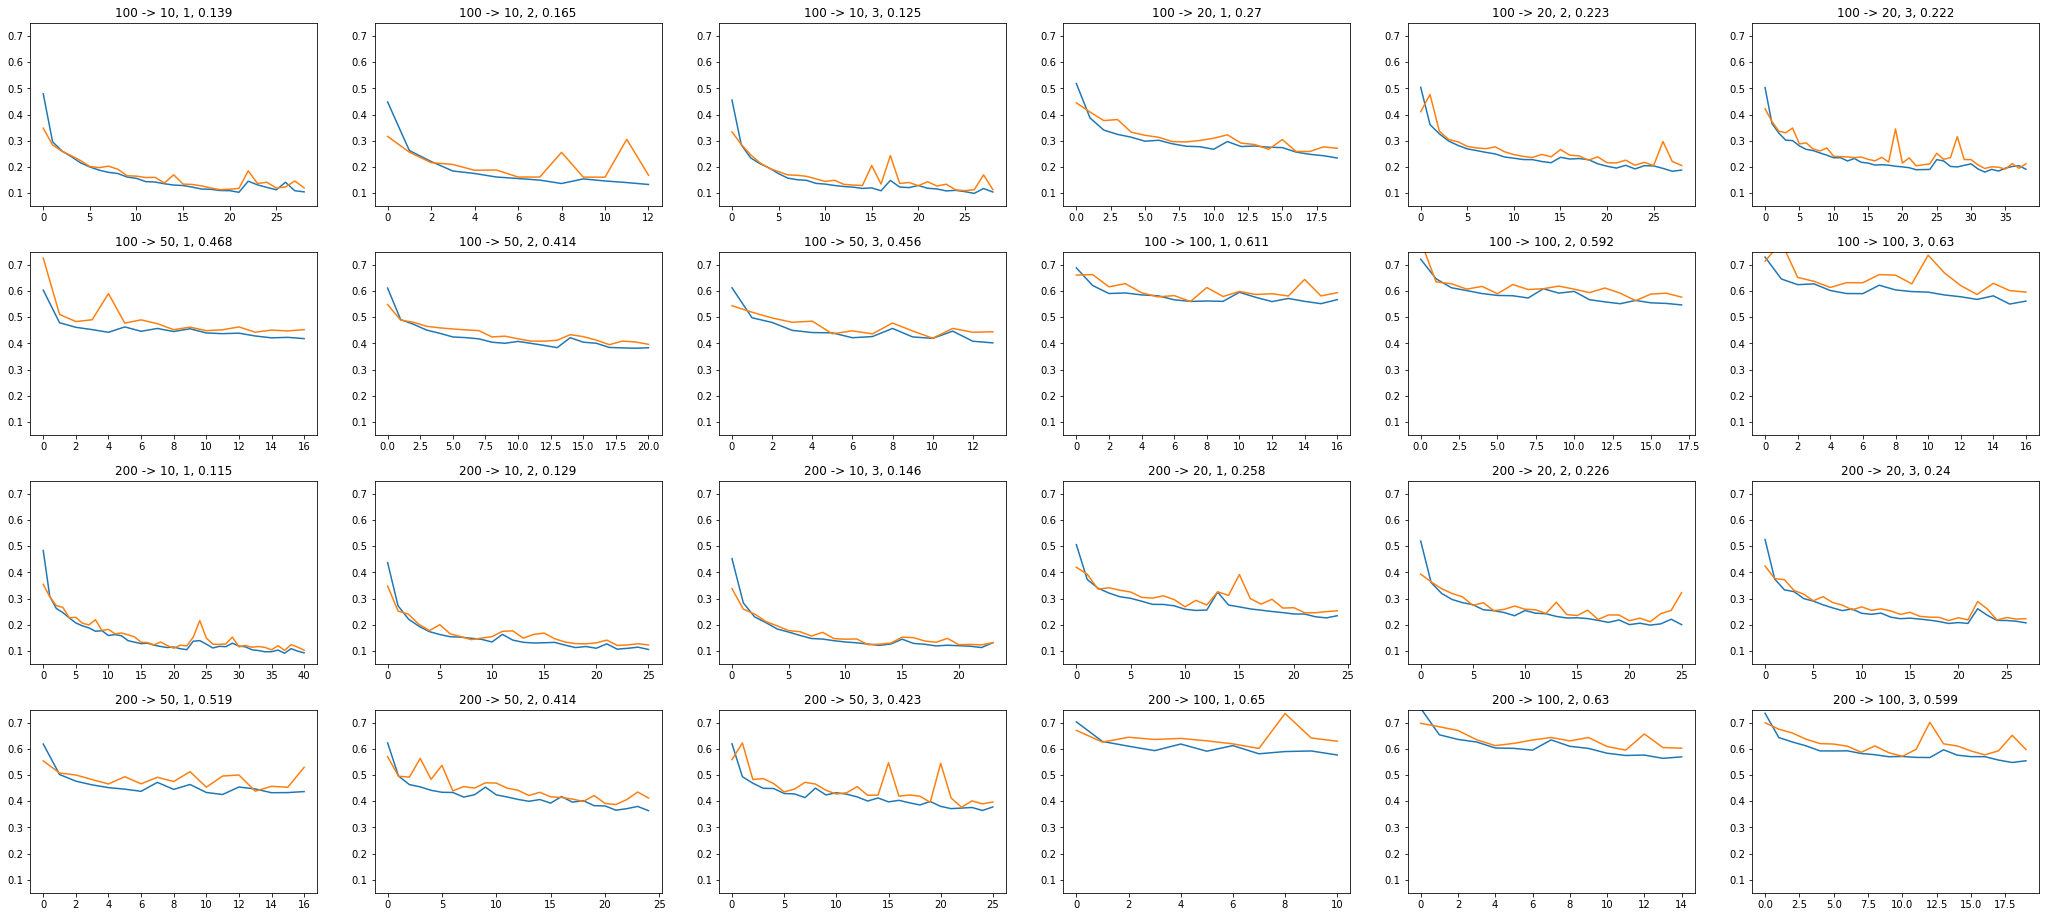

In [35]:
rows = 4
cols = 6
plt.figure(figsize = (6 * cols, 4 * rows))
plt.subplots_adjust(hspace = 0.25)
axes = [plt.subplot(rows, cols, idx + 1) for idx in range(len(lossess))]
for (
    ax, 
    losses, 
    (t_in, t_out, architecture, mse)
) in zip(
    axes, 
    lossess, 
    df.values
):
    ax.set_ylim(0.05, 0.75)
    ax.plot(losses[0])
    ax.plot(losses[1])
    ax.set_title(f'{int(t_in)} -> {int(t_out)}, {int(architecture)}, {round(mse, 3)}')
plt.show()